# Building a Recommender System from Scratch

### Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Load Data

We will be using different versions of the [MovieLens dataset](https://grouplens.org/datasets/movielens/), mainly `ml-latest-small.zip`:

- ratings.csv
- movies.csv


In [3]:
ratings = pd.read_csv('../data/ratings.csv')

In [4]:
ratings.head(20)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [5]:
ratings.timestamp = pd.to_datetime(ratings.timestamp,unit='s')
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51
5,1,70,3.0,2000-07-30 18:40:00
6,1,101,5.0,2000-07-30 18:14:28
7,1,110,4.0,2000-07-30 18:36:16
8,1,151,5.0,2000-07-30 19:07:21
9,1,157,5.0,2000-07-30 19:08:20


In [6]:
movies = pd.read_csv('../data/movies.csv')

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
def extract_year(title):
    m = re.match("^(.*) \\(([0-9 \\-]*)\\)$", title.strip())
    if m and len(m.groups()) == 2:
        return m.groups()[1]
    else:
        return None

def extract_title(title):
    m = re.match("^(.*) \\(([0-9 \\-]*)\\)$", title.strip())
    if m:
        return m.groups()[0]
    else:
        return title

def extract_main_genre(genres):
    if len(genres):
        return genres.split('|')[0]
    else:
        return None
    
movies['genre'] = movies.genres.apply(extract_main_genre)  
movies['year'] = movies.title.apply(lambda x: extract_year(x))
movies.title = movies.title.apply(lambda x: extract_title(x))

movies.head()

,movieId,title,genres,genre,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Adventure,1995
1,2,Jumanji,Adventure|Children|Fantasy,Adventure,1995
2,3,Grumpier Old Men,Comedy|Romance,Comedy,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,Comedy,1995
4,5,Father of the Bride Part II,Comedy,Comedy,1995


In [9]:
# Step 1
# We start with creating a new dataframe from the series with EmployeeId as the index
genres = pd.DataFrame(movies.genres.str.split('|').tolist(), index=movies.movieId).stack()

# Step 2
# We now want to get rid of the secondary index
# To do this, we will make EmployeeId as a column (it can't be an index since the values will be duplicate)
genres = genres.reset_index([0, 'movieId'])# Step 3

# The final step is to set the column names as we want them
genres.columns = ['movieId', 'genre']

genres.head(30)

,movieId,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


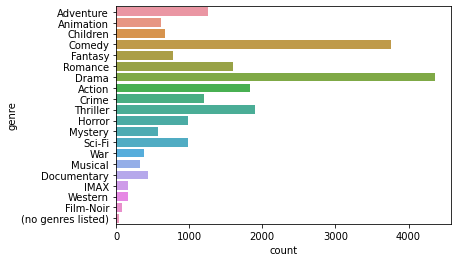

In [10]:
sns.countplot(y='genre', data=genres)

### Exploratory Data Analysis

In [11]:
n_ratings = len(ratings)
n_movies = ratings['movieId'].nunique()
n_users = ratings['userId'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")

Number of ratings: 100836
Number of unique movieId's: 9724
Number of unique users: 610


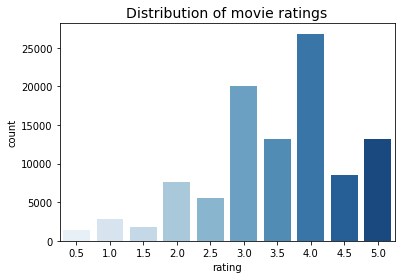

Mean global rating: 3.5.


In [12]:
sns.countplot(x="rating", data=ratings, palette="Blues")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

print(f"Mean global rating: {round(ratings['rating'].mean(),2)}.")

In [13]:
n_ratings_per_user = ratings.groupby('userId')['rating'].count()
n_ratings_per_movie = ratings.groupby('movieId')['rating'].count()

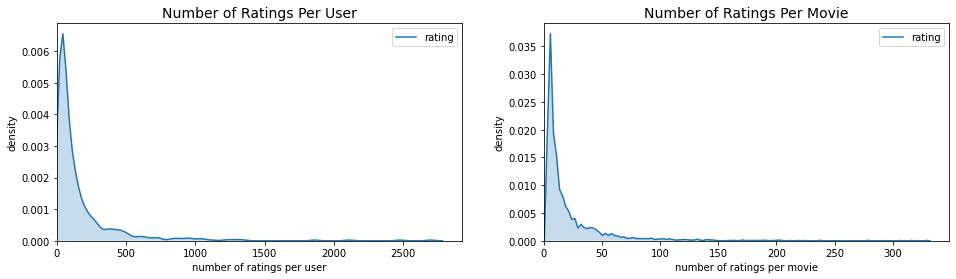

In [14]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(n_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per User", fontsize=14)
plt.xlabel("number of ratings per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(n_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Number of Ratings Per Movie", fontsize=14)
plt.xlabel("number of ratings per movie")
plt.ylabel("density")
plt.show()

In [15]:
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per movie: {round(n_ratings/n_movies, 2)}")

print(f"Most active user rated {n_ratings_per_user.max()} movies.")
print(f"Least active user rated {n_ratings_per_user.min()} movies.")

print(f"Most rated movie has {n_ratings_per_movie.max()} ratings.")
print(f"Least rated movie has {n_ratings_per_movie.min()} ratings.")

Average number of ratings per user: 165.3
Average number of ratings per movie: 10.37
Most active user rated 2698 movies.
Least active user rated 20 movies.
Most rated movie has 329 ratings.
Least rated movie has 1 ratings.


In [16]:
mean_ratings_per_user = ratings.groupby('userId')['rating'].mean()
mean_ratings_per_movie = ratings.groupby('movieId')['rating'].mean()

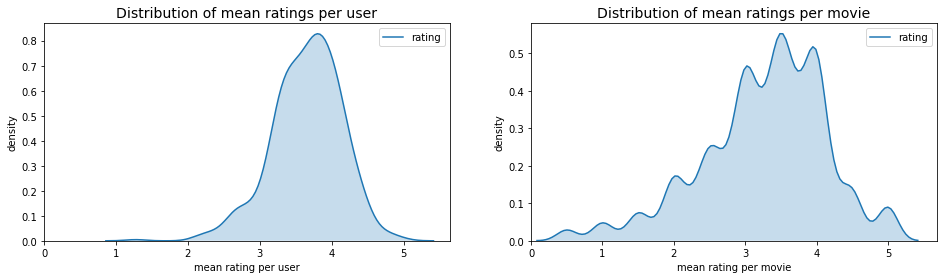

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.kdeplot(mean_ratings_per_user, shade=True)
plt.xlim(0)
plt.title("Distribution of mean ratings per user", fontsize=14)
plt.xlabel("mean rating per user")
plt.ylabel("density")
plt.subplot(1,2,2)
sns.kdeplot(mean_ratings_per_movie, shade=True)
plt.xlim(0)
plt.title("Distribution of mean ratings per movie", fontsize=14)
plt.xlabel("mean rating per movie")
plt.ylabel("density")
plt.show()

### Best vs. Worst Movie

Which movie has the lowest and highest average rating?

In [18]:
lowest_rated = mean_ratings_per_movie.idxmin()
movies[movies['movieId'] == lowest_rated]


,movieId,title,genres,genre,year
2689,3604,Gypsy,Musical,Musical,1962


`Gypsy` has the lowest average rating.

In [19]:
highest_rated = mean_ratings_per_movie.idxmax()
movies[movies['movieId'] == highest_rated]

,movieId,title,genres,genre,year
48,53,Lamerica,Adventure|Drama,Adventure,1994


Lamerica may be the "highest" rated movie, but it only has one rating. A better approach for evaluating movie popularity is to do look at the [Bayesian average](https://en.wikipedia.org/wiki/Bayesian_average).

#### Bayesian Average

Bayesian average is a method of estimating the mean of a population using outside information, especially a pre-existing belief, that is factored into the calculation. This is a central feature of Bayesian interpretation. This is useful when the available data set is small.

Calculating the Bayesian average uses the prior mean m and a constant C. C is chosen based on the typical data set size required for a robust estimate of the sample mean. The value is larger when the expected variation between data sets (within the larger population) is small. It is smaller when the data sets are expected to vary substantially from one another. 

$r_{i} = \frac{C \times m + \Sigma{\text{reviews}}}{C+N}$

In this case, our prior will be the average rating across all movies. Let's make $C$ be the average number of ratings for a given movie. $N$ is the total number of reviews for movie $i$.

In [20]:
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

In [21]:
movie_stats.head()

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429


In [22]:
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

def bayesian_avg(ratings):
    bayesian_avg = (C*m+ratings.sum())/(C+ratings.count())
    return bayesian_avg

bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')

In [23]:
movie_stats.head()

,movieId,count,mean,bayesian_avg
0,1,215,3.920930,3.890632
1,2,110,3.431818,3.417227
2,3,52,3.259615,3.260086
3,4,7,2.357143,2.897612
4,5,49,3.071429,3.104793


In [24]:
movie_stats = movie_stats.merge(movies[['movieId', 'title']], on='movieId')
movie_stats.set_index('movieId', drop=False, inplace=True)

In [25]:
movie_stats.head()

,movieId,count,mean,bayesian_avg,title
movieId,,,,,
1,1,215,3.920930,3.890632,Toy Story
2,2,110,3.431818,3.417227,Jumanji
3,3,52,3.259615,3.260086,Grumpier Old Men
4,4,7,2.357143,2.897612,Waiting to Exhale
5,5,49,3.071429,3.104793,Father of the Bride Part II


#### Best movies

In [26]:
movie_stats.sort_values('bayesian_avg', ascending=False).head()

,movieId,count,mean,bayesian_avg,title
movieId,,,,,
318,318,317,4.429022,4.392070,"Shawshank Redemption, The"
858,858,192,4.289062,4.236457,"Godfather, The"
2959,2959,218,4.272936,4.227052,Fight Club
260,260,251,4.231076,4.192646,Star Wars: Episode IV - A New Hope
50,50,204,4.237745,4.190567,"Usual Suspects, The"


Using the Bayesian average, we see that `Shawshank Redemption`, `The Godfather`, and `The Usual Suspects` are the most highly rated movies. This result makes much more sense.

#### Worst movies

In [27]:
movie_stats.sort_values('bayesian_avg', ascending=True).head()

,movieId,count,mean,bayesian_avg,title
movieId,,,,,
1556,1556,19,1.605263,2.190377,Speed 2: Cruise Control
3593,3593,19,1.657895,2.224426,Battlefield Earth
1882,1882,33,1.954545,2.267268,Godzilla
1499,1499,27,1.925926,2.296800,Anaconda
2643,2643,16,1.687500,2.306841,Superman IV: The Quest for Peace


With Bayesian averaging, it looks like `Speed 2: Cruise Control`, `Battlefield Earth`, and `Godzilla` are the worst rated movies.

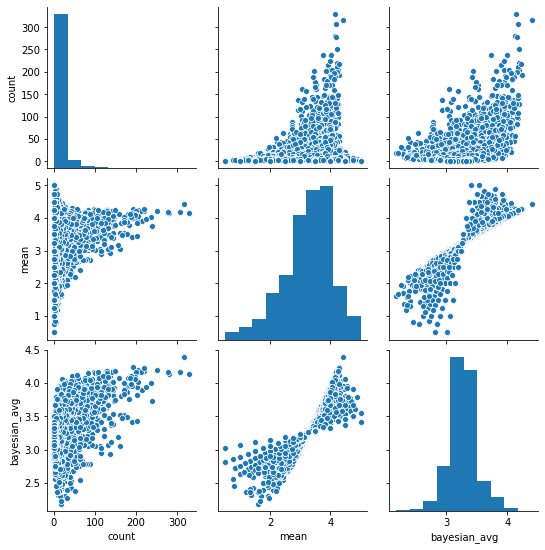

In [28]:
sns.pairplot(movie_stats[['count', 'mean', 'bayesian_avg']])

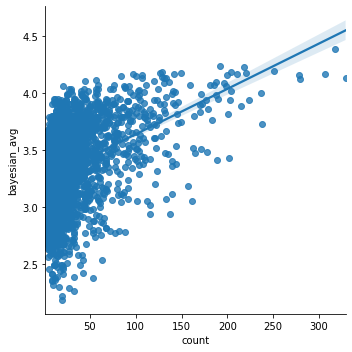

In [29]:
sns.lmplot('count', 'bayesian_avg', data=movie_stats)

### Data Pre-processing

We will be using colaborative filtering to generate recommendations for users. This technique is based on the premise that similar people like similar things. 

The first step is to transform our data into a user-item matrix, also known as a "utility" matrix. In this matrix, rows represent users and columns represent movies. The beauty of collaborative filtering is that it doesn't require any information about the users or the movies user to generate recommendations.

<img src="imgs/user-movie-matrix.png" width=60%/>

In [30]:
utility_matrix = ratings[['userId', 'movieId', 'rating']].pivot_table(index='userId', values='rating', columns='movieId').fillna(0)

In [31]:
from scipy.sparse import csr_matrix
X = csr_matrix(ratings[['userId', 'movieId', 'rating']].pivot_table(index='userId', values='rating', columns='movieId').fillna(0))

#### Evaluating sparsity

Here, we calculate sparsity by dividing the number of stored elements by total number of elements. The number of stored (non-empty) elements in our matrix is equivalent to the number of ratings in our dataset.

`csr_matrix.nnz` or `csr_matrix.getnnz()` counts the stored values in our sparse matrix. The rest of our cells are empty.

In [32]:
n_total = np.prod(X.shape)
n_ratings = X.getnnz()
sparsity = n_ratings/n_total
print(f"Matrix sparsity: {round(sparsity*100,2)}%")

Matrix sparsity: 1.7%


In [33]:
movie_ids = (utility_matrix.columns)
user_ids = (utility_matrix.index)

In [34]:
movies.head()

,movieId,title,genres,genre,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Adventure,1995
1,2,Jumanji,Adventure|Children|Fantasy,Adventure,1995
2,3,Grumpier Old Men,Comedy|Romance,Comedy,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,Comedy,1995
4,5,Father of the Bride Part II,Comedy,Comedy,1995


In [35]:
movies.set_index('movieId', inplace=True, drop=False)

In [36]:
movies

,movieId,title,genres,genre,year
movieId,,,,,
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Adventure,1995
2,2,Jumanji,Adventure|Children|Fantasy,Adventure,1995
3,3,Grumpier Old Men,Comedy|Romance,Comedy,1995
4,4,Waiting to Exhale,Comedy|Drama|Romance,Comedy,1995
5,5,Father of the Bride Part II,Comedy,Comedy,1995
...,...,...,...,...,...
193581,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,Action,2017
193583,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,Animation,2017
193585,193585,Flint,Drama,Drama,2017


#### Normalizing our data

User-item bias is defined as: $b_{ui} = \mu + b_{u} + b_{i}$

We will perform mean normalization by subtracting $b_{i}$ from each movie's rating.

In [37]:
sum_ratings_per_movie = X.sum(axis=0)
n_ratings_per_movie = X.getnnz(axis=0)
mean_rating_per_movie = sum_ratings_per_movie/n_ratings_per_movie

Now that we have the mean rating for each movie, we are going to subtract this from our utility matrix. In order to do this, we need to expand our 1D `mean_rating_per_movie` array into a matrix with the same shape as our utility matrix `(n_users, n_movies)`. Numpy's `tile` method is useful for this task.

In [38]:
X_mean_movie = np.tile(mean_rating_per_movie, (X.shape[0],1))

In [39]:
X_mean_movie.shape

(610, 9724)

`X_mean_movie` is a matrix of shape (n_users, n_movies) in which each column is populated with a given movie's mean rating.

We can easily normalize our X matrix by subtracting `X_mean_movie` from original `X`.

In [40]:
X_norm = X - csr_matrix(X_mean_movie)

As expected, `X_norm`'s values are different from `X`s. Cells that are empty in the original matrix are now replaced with negative values representing the mean rating of a given movie. 

In [41]:
X.todense()

matrix([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 0. ],
        ...,
        [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
        [3. , 0. , 0. , ..., 0. , 0. , 0. ],
        [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

### Item-item Recommendations with k-Nearest Neighbors

We are going to find the $k$ movies that have the most similar user engagement vectors for movie $i$.

In [42]:
from sklearn.neighbors import NearestNeighbors
kNN = NearestNeighbors(n_neighbors=11, algorithm="brute", metric='cosine')
kNN.fit(X_norm)
neighbour = kNN.kneighbors(X_norm[0], return_distance=False)
movies[movies.movieId.isin(movie_ids[neighbour[0]])]

,movieId,title,genres,genre,year
movieId,,,,,
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Adventure,1995
42,42,Dead Presidents,Action|Crime|Drama,Action,1995
107,107,Muppet Treasure Island,Adventure|Children|Comedy|Musical,Adventure,1996
193,193,Showgirls,Drama,Drama,1995
211,211,"Browning Version, The",Drama,Drama,1994
241,241,Fluke,Children|Drama,Children,1995
267,267,Major Payne,Comedy,Comedy,1995
452,452,Widows' Peak,Drama,Drama,1994
457,457,"Fugitive, The",Thriller,Thriller,1993


In [43]:
def similar_movies(title):
    id = movie_ids.get_loc(movies[movies.title.str.startswith(title)]['movieId'].values[0])
    kNN = NearestNeighbors(n_neighbors=11, algorithm="brute", metric='cosine')
    kNN.fit(X_norm.T)
    neighbour = kNN.kneighbors(X_norm.T[id], return_distance=False)
    return movies[movies.movieId.isin(movie_ids[neighbour[0]])]

In [44]:
similar_movies('Godfather')

,movieId,title,genres,genre,year
movieId,,,,,
858,858,"Godfather, The",Crime|Drama,Crime,1972
1089,1089,Reservoir Dogs,Crime|Mystery|Thriller,Crime,1992
1193,1193,One Flew Over the Cuckoo's Nest,Drama,Drama,1975
1201,1201,"Good, the Bad and the Ugly, The (Buono, il bru...",Action|Adventure|Western,Action,1966
1208,1208,Apocalypse Now,Action|Drama|War,Action,1979
1213,1213,Goodfellas,Crime|Drama,Crime,1990
1219,1219,Psycho,Crime|Horror,Crime,1960
1221,1221,"Godfather: Part II, The",Crime|Drama,Crime,1974
1228,1228,Raging Bull,Drama,Drama,1980


You can also play around with the kNN distance metric and see what results you would get if you use "manhattan" or "euclidean" instead of "cosine".

In [45]:
def best_movies(userId, k=10):
    return movies[movies.movieId.isin(utility_matrix.iloc[userId,:].sort_values(ascending=False)[:k].index)]

In [46]:
best_movies(0,10)

,movieId,title,genres,genre,year
movieId,,,,,
216,216,Billy Madison,Comedy,Comedy,1995
940,940,"Adventures of Robin Hood, The",Action|Adventure|Romance,Action,1938
1240,1240,"Terminator, The",Action|Sci-Fi|Thriller,Action,1984
1256,1256,Duck Soup,Comedy|Musical|War,Comedy,1933
1270,1270,Back to the Future,Adventure|Comedy|Sci-Fi,Adventure,1985
1275,1275,Highlander,Action|Adventure|Fantasy,Action,1986
1278,1278,Young Frankenstein,Comedy|Fantasy,Comedy,1974
2078,2078,"Jungle Book, The",Animation|Children|Comedy|Musical,Animation,1967
3034,3034,Robin Hood,Adventure|Animation|Children|Comedy|Musical,Adventure,1973


In [47]:
def recommend_by_similar_movies(id):
    pelis_favoritas = best_movies(id, k=10)
    recommend = set()
    for peli in pelis_favoritas.title:
        recommend |= set(similar_movies(peli).movieId)
    rec = recommend - set(movie_ids[X[id,:].nonzero()[1]].values)
    return movies[movies.movieId.isin(rec)].head(10)      

In [48]:
recommend_by_similar_movies(0)

,movieId,title,genres,genre,year
movieId,,,,,
146,146,"Amazing Panda Adventure, The",Adventure|Children,Adventure,1995
255,255,"Jerky Boys, The",Comedy,Comedy,1995
313,313,"Swan Princess, The",Animation|Children,Animation,1994
405,405,Highlander III: The Sorcerer (a.k.a. Highlande...,Action|Fantasy,Action,1994
484,484,Lassie,Adventure|Children,Adventure,1994
520,520,Robin Hood: Men in Tights,Comedy,Comedy,1993
562,562,Welcome to the Dollhouse,Comedy|Drama,Comedy,1995
569,569,Little Big League,Comedy|Drama,Comedy,1994
946,946,To Be or Not to Be,Comedy|Drama|War,Comedy,1942


In [49]:
def similar_users(id):
    kNN = NearestNeighbors(n_neighbors=11, algorithm="brute", metric='cosine')
    kNN.fit(X_norm)
    neighbour = kNN.kneighbors(X_norm[id], return_distance=False)
    return neighbour[0][1:]

In [50]:
similar_users(0)

array([492,  38, 493, 207, 179, 393, 163,  95, 230, 398])

In [51]:
def recommend_by_similar_users(id):
    recommend = set()
    for i in similar_users(id):
        recommend |= (set(best_movies(i,10).movieId))
    rec = recommend - set(movie_ids[X[id,:].nonzero()[1]].values)
    return movies[movies.movieId.isin(rec)].head(10)

In [52]:
recommend_by_similar_users(0)

,movieId,title,genres,genre,year
movieId,,,,,
34,34,Babe,Children|Drama,Children,1995
150,150,Apollo 13,Adventure|Drama|IMAX,Adventure,1995
225,225,Disclosure,Drama|Thriller,Drama,1994
272,272,"Madness of King George, The",Comedy|Drama,Comedy,1994
380,380,True Lies,Action|Adventure|Comedy|Romance|Thriller,Action,1994
589,589,Terminator 2: Judgment Day,Action|Sci-Fi,Action,1991
858,858,"Godfather, The",Crime|Drama,Crime,1972
1036,1036,Die Hard,Action|Crime|Thriller,Action,1988
1200,1200,Aliens,Action|Adventure|Horror|Sci-Fi,Action,1986


### Dimensionality Reduction with Matrix Factorization (Model based)

Matrix factorization (MF) is a linear algebra technique that can help us discover latent features underlying the interactions between users and movies. These latent features give a more compact representation of user tastes and item descriptions. MF is particularly useful for very sparse data and can enhance the quality of recommendations. The algorithm works by factorizing the original user-item matrix into two factor matrices:

- user-factor matrix (n_users, k)
- item-factor matrix (k, n_items)

We are reducing the dimensions of our original matrix into "taste" dimensions. We cannot interpret what each latent feature $k$ represents. However, we could imagine that one latent feature may represent users who like romantic comedies from the 1990s, while another latent feature may represent movies which are independent foreign language films.

$$X_{mn}\approx P_{mk}\times Q_{nk}^T = \hat{X} $$
<img src="imgs/matrix-factorization.png" width="50%"/>

In [53]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=20, n_iter=10)
Z = svd.fit_transform(X.T)

The results above are the most similar movies to Toy Story using kNN on our “compressed” movie-factor matrix. We reduced the dimensions down to n_components=30. We can think of each component representing a latent feature such as movie genre.

#### Predicting missing ratings to generate top N recommendations

With matrix factorization, we can also predict missing ratings in our original user-item matrix. We can do this by reconstructing our matrix by getting the inner product of our user-factor matrix and movie-factor matrix. We can use the `inverse_transform` on our movie-factor matrix Z to get our reconstructed user-item matrix.

In [54]:
new_X = svd.inverse_transform(Z).T

Let’s look at `userId=100`’s recommendations. In the table below, we can see which movies that have been rated highly:

In [55]:
def recomendaciones(userId, k=10):
    rec = pd.DataFrame(list(zip(movies.title, utility_matrix.iloc[userId,:], new_X[userId,:])), columns=['movie', 'rating', 'pred'])
    # rec[rec.rating>4].sort_values('pred', ascending=False).head(10)
    return rec[rec.rating==0].sort_values('pred', ascending=False).head(10)

In [56]:
recomendaciones(100)

,movie,rating,pred
1938,"Walk on the Moon, A",0.0,1.233874
1403,Whatever,0.0,0.875737
1297,Mr. Magoo,0.0,0.868301
827,Dirty Dancing,0.0,0.837578
1733,Vampires,0.0,0.801190
1182,Fall,0.0,0.796141
1502,Jane Austen's Mafia!,0.0,0.795637
613,Trainspotting,0.0,0.766051
1283,For Richer or Poorer,0.0,0.751770
3136,"Longest Yard, The",0.0,0.749209


### Using NMF

In [57]:
from sklearn.decomposition import NMF

parametersNMF = {
                    'n_components' : 20,     # number of latent factors
                    'init' : 'random', 
                    'random_state' : 0, 
                    'alpha' : 0.01,          # regularization term
                    'l1_ratio' : 0,          # set regularization = L2 
                    'max_iter' : 15
                }

estimator = NMF(**parametersNMF)
Z = estimator.fit_transform(X)
new_X = estimator.inverse_transform(Z)

In [58]:
best_movies(120)

,movieId,title,genres,genre,year
movieId,,,,,
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Adventure,1995
6,6,Heat,Action|Crime|Thriller,Action,1995
16,16,Casino,Crime|Drama,Crime,1995
25,25,Leaving Las Vegas,Drama|Romance,Drama,1995
39,39,Clueless,Comedy|Romance,Comedy,1995
62,62,Mr. Holland's Opus,Drama,Drama,1995
163,163,Desperado,Action|Romance|Western,Action,1995
318,318,"Shawshank Redemption, The",Crime|Drama,Crime,1994
337,337,What's Eating Gilbert Grape,Drama,Drama,1993


In [59]:
recomendaciones(120)

,movie,rating,pred
418,Jurassic Park,0.0,2.237007
510,"Silence of the Lambs, The",0.0,2.173045
138,Die Hard: With a Vengeance,0.0,1.988764
322,"Lion King, The",0.0,1.967379
506,Aladdin,0.0,1.957672
507,Terminator 2: Judgment Day,0.0,1.846749
31,Twelve Monkeys (a.k.a. 12 Monkeys),0.0,1.828117
546,Mission: Impossible,0.0,1.645668
436,Mrs. Doubtfire,0.0,1.637723
594,Twister,0.0,1.626862


## Content-Based Recommendation Model
### Handling the cold-start problem

Collaborative filtering relies solely on user-item interactions within the utility matrix. The issue with this approach is that brand new users or items with no iteractions get excluded from the recommendation system. This is called the **cold start problem**. Content-based filtering is a way to handle this problem by generating recommendations based on user and item features.

First, we need to convert the `genres` column into binary features. Each genre will have its own column in the dataframe, and will be populated with 0 or 1.

**How many movie genres are there?**

In [60]:
genres.genre.value_counts()

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: genre, dtype: int64

In [61]:
pd.crosstab(genres.movieId, genres.genre)

genre,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [62]:
movie_genres = pd.crosstab(genres.movieId, genres.genre)

### Cosine distance/similarity

In [63]:
from scipy.spatial.distance import squareform, pdist

def distancia(summary, metric='cosine'):
    pairwise = pd.DataFrame(
        squareform(pdist(summary, metric)),
        columns = summary.index,
        index = summary.index
    )
    return pairwise

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres)
print(f"Dimensions of our genres cosine similarity matrix: {cosine_sim.shape}")

Dimensions of our genres cosine similarity matrix: (9742, 9742)


In [65]:
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

In [66]:
cosine_dist = distancia(movie_genres)

In [67]:
cosine_dist

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.225403,0.683772,0.741801,0.552786,1.000000,6.837722e-01,0.367544,1.000000,0.741801,...,0.552786,0.683772,0.683772,0.552786,1.0,0.329180,0.225403,1.00000,0.683772,0.552786
2,0.225403,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.183503,1.000000,0.666667,...,1.000000,1.000000,1.000000,1.000000,1.0,0.711325,0.666667,1.00000,1.000000,1.000000
3,0.683772,1.000000,0.000000,0.183503,0.292893,1.000000,2.220446e-16,1.000000,1.000000,1.000000,...,0.646447,1.000000,0.500000,1.000000,1.0,0.646447,0.591752,1.00000,1.000000,0.292893
4,0.741801,1.000000,0.183503,0.000000,0.422650,1.000000,1.835034e-01,1.000000,1.000000,1.000000,...,0.711325,0.591752,0.183503,1.000000,1.0,0.711325,0.666667,0.42265,1.000000,0.422650
5,0.552786,1.000000,0.292893,0.422650,0.000000,1.000000,2.928932e-01,1.000000,1.000000,1.000000,...,0.500000,1.000000,0.292893,1.000000,1.0,0.500000,0.422650,1.00000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.329180,0.711325,0.646447,0.711325,0.500000,0.711325,6.464466e-01,1.000000,0.500000,0.711325,...,0.250000,0.646447,0.646447,0.500000,1.0,0.000000,0.133975,1.00000,0.292893,0.500000
193583,0.225403,0.666667,0.591752,0.666667,0.422650,1.000000,5.917517e-01,1.000000,1.000000,1.000000,...,0.422650,0.591752,0.591752,0.422650,1.0,0.133975,0.000000,1.00000,0.591752,0.422650
193585,1.000000,1.000000,1.000000,0.422650,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,0.292893,0.292893,1.000000,1.0,1.000000,1.000000,0.00000,1.000000,1.000000


In [68]:
1 - cosine_dist

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.774597,0.316228,0.258199,0.447214,0.000000,0.316228,0.632456,0.000000,0.258199,...,0.447214,0.316228,0.316228,0.447214,0.0,0.670820,0.774597,0.00000,0.316228,0.447214
2,0.774597,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.816497,0.000000,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.288675,0.333333,0.00000,0.000000,0.000000
3,0.316228,0.000000,1.000000,0.816497,0.707107,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.353553,0.000000,0.500000,0.000000,0.0,0.353553,0.408248,0.00000,0.000000,0.707107
4,0.258199,0.000000,0.816497,1.000000,0.577350,0.000000,0.816497,0.000000,0.000000,0.000000,...,0.288675,0.408248,0.816497,0.000000,0.0,0.288675,0.333333,0.57735,0.000000,0.577350
5,0.447214,0.000000,0.707107,0.577350,1.000000,0.000000,0.707107,0.000000,0.000000,0.000000,...,0.500000,0.000000,0.707107,0.000000,0.0,0.500000,0.577350,0.00000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.670820,0.288675,0.353553,0.288675,0.500000,0.288675,0.353553,0.000000,0.500000,0.288675,...,0.750000,0.353553,0.353553,0.500000,0.0,1.000000,0.866025,0.00000,0.707107,0.500000
193583,0.774597,0.333333,0.408248,0.333333,0.577350,0.000000,0.408248,0.000000,0.000000,0.000000,...,0.577350,0.408248,0.408248,0.577350,0.0,0.866025,1.000000,0.00000,0.408248,0.577350
193585,0.000000,0.000000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.707107,0.707107,0.000000,0.0,0.000000,0.000000,1.00000,0.000000,0.000000


In [68]:
# Function that get movie recommendations based on the cosine similarity score of movie genres
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])
def genre_recommendations(title, distancias):
    idx = movie_ids.get_loc(movies[movies.title.str.startswith(title)]['movieId'].values[0])
 
    sim_scores = list(enumerate(distancias[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    similar_movies = [i[0] for i in sim_scores]

    print(f"Recommendations for {title}:")
    return movies['title'].iloc[similar_movies]

In [69]:
genre_recommendations('Blade Runner', cosine_sim)

Recommendations for Blade Runner:


movieId
76            Screamers
172     Johnny Mnemonic
338          Virtuosity
379             Timecop
541        Blade Runner
692                Solo
748        Arrival, The
1240    Terminator, The
1882           Godzilla
2571        Matrix, The
2600           eXistenZ
3527           Predator
3697         Predator 2
3981         Red Planet
3986       6th Day, The
4443            Outland
4553          They Live
4887           One, The
5181          Hangar 18
5903        Equilibrium
Name: title, dtype: object

The dimensions of our cosine similarity matrix are $M \times M$ where $M$ represents the total number of movies.

With this approach, we are assuming that two movies are "similar" if they have similar genres. These "similar movie" recommendations are based solely on the metadata from our movies dataset. Feel free to test out different movies.


### TF/IDF
The concepts of **Term Frequency (TF)** and **Inverse Document Frequency (IDF)** are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). They are used to determine the relative importance of a document / article / news item / movie etc.

TF is simply the frequency of a word in a document. IDF is the inverse of the document frequency among the whole corpus of documents. TF-IDF is used mainly because of two reasons: Suppose we search for “**the results of latest European Socccer games**” on Google. It is certain that “**the**” will occur more frequently than “**soccer games**” but the relative importance of **soccer games** is higher than the search query point of view. In such cases, TF-IDF weighting negates the effect of high frequency words in determining the importance of an item (document).

Below is the equation to calculate the TF-IDF score:
![tfidf](images/tfidf.jpg)

After calculating TF-IDF scores, how do we determine which items are closer to each other, rather closer to the user profile? This is accomplished using the **Vector Space Model** which computes the proximity based on the angle between the vectors. In this model, each item is stored as a vector of its attributes (which are also vectors) in an **n-dimensional space** and the angles between the vectors are calculated to **determine the similarity between the vectors**. Next, the user profile vectors are also created based on his actions on previous attributes of items and the similarity between an item and a user is also determined in a similar way.

![vector-space](images/vector_space.png)

Sentence 2 is more likely to be using Term 2 than using Term 1. Vice-versa for Sentence 1. The method of calculating this relative measure is calculated by taking the cosine of the angle between the sentences and the terms. The ultimate reason behind using cosine is that the **value of cosine will increase with decreasing value of the angle** between which signifies more similarity. The vectors are length normalized after which they become vectors of length 1 and then the cosine calculation is simply the sum-product of vectors.

### Implementation
With all that theory in mind, I am going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file **movies.csv**.

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(9742, 177)

In [71]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.35372644, 0.        , 0.79136592, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

We will be using again the **[Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html)** to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's **linear_kernel** instead of cosine_similarities since it is much faster.

In [72]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [73]:
genre_recommendations('Blade Runner', cosine_sim)

Recommendations for Blade Runner:


movieId
76            Screamers
172     Johnny Mnemonic
338          Virtuosity
379             Timecop
541        Blade Runner
692                Solo
748        Arrival, The
1240    Terminator, The
1882           Godzilla
2571        Matrix, The
2600           eXistenZ
3527           Predator
3697         Predator 2
3981         Red Planet
3986       6th Day, The
4443            Outland
4553          They Live
4887           One, The
5181          Hangar 18
5903        Equilibrium
Name: title, dtype: object

## Using tags

In [74]:
# df_tags = pd.read_csv('../data/tags.csv') 
# movies.index = movies.index.rename('index')
# movie_tags = movies.merge(df_tags, on='movieId')[['movieId', 'tagId', 'tag']]
# movie_tags = movie_tags.groupby('movieId')['tag'].agg(lambda x: ' '.join(x))
# movie_tags = pd.DataFrame(movie_tags).reset_index()
# movie_tags.to_csv('../data/movie_tags.csv', index=False)

In [75]:
movie_tags = pd.read_csv('../data/movie_tags.csv')

In [76]:
movie_tags.head()

,movieId,tag
0,1,3d action adaptation adapted from:book adventu...
1,2,action adaptation adapted from:book adventure ...
2,3,adventure betrayal catastrophe chase comedy cu...
3,4,adaptation adapted from:book based on book bet...
4,5,bittersweet catastrophe chase comedy culture c...


In [83]:
movies.reset_index(inplace=True)
movies.head()

,movieId,title,genres,genre,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Adventure,1995
1,2,Jumanji,Adventure|Children|Fantasy,Adventure,1995
2,3,Grumpier Old Men,Comedy|Romance,Comedy,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,Comedy,1995
4,5,Father of the Bride Part II,Comedy,Comedy,1995


In [84]:

movie_tags = movie_tags.merge(movies[['movieId','title']], on='movieId')
movie_tags.set_index('movieId', drop=False, inplace=True)
movie_tags.head()

,movieId,tag,title
movieId,,,
1,1,3d action adaptation adapted from:book adventu...,Toy Story
2,2,action adaptation adapted from:book adventure ...,Jumanji
3,3,adventure betrayal catastrophe chase comedy cu...,Grumpier Old Men
4,4,adaptation adapted from:book based on book bet...,Waiting to Exhale
5,5,bittersweet catastrophe chase comedy culture c...,Father of the Bride Part II


In [79]:
len(movie_tags)

8746

In [99]:
tf_idf = TfidfVectorizer()
df_movies_tf_idf_described = tf_idf.fit_transform(movie_tags.tag)

In [100]:
m2m = cosine_similarity(df_movies_tf_idf_described)

In [85]:
# Function that get movie recommendations based on the cosine similarity score of movie tags
titles = movie_tags['title']
movie_tags_ids = movie_tags.index
def genre_recommendations_tag(title, distancias):
    idx = movie_ids.get_loc(movie_tags[movie_tags.title.str.startswith(title)]['movieId'].values[0])
 
    sim_scores = list(enumerate(distancias[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    similar_movies = [i[0] for i in sim_scores]

    print(f"Recommendations for {title}:")
    return movie_tags['title'].iloc[similar_movies]

In [103]:
genre_recommendations_tag('Toy Story', m2m)

Recommendations for Toy Story:


movieId
3114                         Toy Story 2
4886                      Monsters, Inc.
2355                       Bug's Life, A
78499                        Toy Story 3
6377                        Finding Nemo
364                       Lion King, The
4306                               Shrek
68954                                 Up
42191                           Luxo Jr.
85316     Winnie the Pooh and Tigger Too
95654                        Geri's Game
8961                    Incredibles, The
50872                        Ratatouille
152081                          Zootopia
177765                              Coco
76093           How to Train Your Dragon
45517                               Cars
2761                     Iron Giant, The
137857                   The Jungle Book
5218                             Ice Age
Name: title, dtype: object

### Evaluation

How do we know if our recommendations are good? The best way to evaluate our system is to test it in the wild with A/B testing or usability tests, where we can get direct feedback from users. However, this option is not always available which means that we need to use offline metrics. 

In traditional machine learning, we evaluate a model by splitting our data into two sets: 1) `training set` and 2) `validation set`. We train our model using the `training set`, then test our model on the `validation set`. In recommender systems, we can't split our data the traditional way because our model won't work if our training set represents a completely different user population than the validation set. Instead, we generate our `training set` by masking random interactions in our user-item matrix. In other words, we pretend that we don't if a user liked or hated Movie X, but we actually do. Once we train our model and generate our rating predictions, we can then compare our predicted rating with the actual rating. 

<img src="imgs/splitting.png" width="60%"/>

There are various ways to compare our predicted vs. actual ratings. The most common metrics include:
    
1) Root Mean Squared Error: $\text{RMSE} = \sqrt{\frac{\Sigma^N_{i=1}(y-\hat{y})^2}{N}}$

2) Precision: $\text{Precision} = \frac{TP}{TP+FP}$

3) Recall: $\text{Recall} = \frac{TP}{TP+FN}$

# Using surprise

In [ ]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


# User analysis

In [87]:
users = pd.read_csv('../data/movielens/users.csv', sep='\t')

In [88]:
users.head()

,Unnamed: 0,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,0,1,F,1,10,48067,Under 18,K-12 student
1,1,2,M,56,16,70072,56+,self-employed
2,2,3,M,25,15,55117,25-34,scientist
3,3,4,M,45,7,02460,45-49,executive/managerial
4,4,5,M,25,20,55455,25-34,writer


In [96]:
ratings_users = ratings.merge(users[['user_id', 'gender', 'age', 'age_desc', 'occ_desc']], left_on='userId', right_on='user_id')

In [97]:
ratings_users

,userId,movieId,rating,timestamp,user_id,gender,age,age_desc,occ_desc
0,1,1,4.0,2000-07-30 18:45:03,1,F,1,Under 18,K-12 student
1,1,3,4.0,2000-07-30 18:20:47,1,F,1,Under 18,K-12 student
2,1,6,4.0,2000-07-30 18:37:04,1,F,1,Under 18,K-12 student
3,1,47,5.0,2000-07-30 19:03:35,1,F,1,Under 18,K-12 student
4,1,50,5.0,2000-07-30 18:48:51,1,F,1,Under 18,K-12 student
...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03 21:53:22,610,M,25,25-34,college/grad student
100832,610,168248,5.0,2017-05-03 22:21:31,610,M,25,25-34,college/grad student
100833,610,168250,5.0,2017-05-08 19:50:47,610,M,25,25-34,college/grad student
100834,610,168252,5.0,2017-05-03 21:19:12,610,M,25,25-34,college/grad student
